# Temperature Forecast Project

In [1]:
#importing required libreries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
import warnings
warnings.filterwarnings('ignore')

## Examining The Data

In [2]:
#reading csv file
df= pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv')

In [3]:
#cheking the head
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [4]:
# checking null values
np.where(pd.isnull(df))[0]

array([ 225,  225,  271, ..., 7750, 7751, 7751])

In [5]:
# removing null values
df.drop(list(np.where(pd.isnull(df))[0]),inplace=True)

In [6]:
#checking shape
df.shape

(7588, 25)

* Dataset contains 7588 rows and 25 columns.

In [7]:
#checking information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7588 entries, 0 to 7749
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7588 non-null   float64
 1   Date              7588 non-null   object 
 2   Present_Tmax      7588 non-null   float64
 3   Present_Tmin      7588 non-null   float64
 4   LDAPS_RHmin       7588 non-null   float64
 5   LDAPS_RHmax       7588 non-null   float64
 6   LDAPS_Tmax_lapse  7588 non-null   float64
 7   LDAPS_Tmin_lapse  7588 non-null   float64
 8   LDAPS_WS          7588 non-null   float64
 9   LDAPS_LH          7588 non-null   float64
 10  LDAPS_CC1         7588 non-null   float64
 11  LDAPS_CC2         7588 non-null   float64
 12  LDAPS_CC3         7588 non-null   float64
 13  LDAPS_CC4         7588 non-null   float64
 14  LDAPS_PPT1        7588 non-null   float64
 15  LDAPS_PPT2        7588 non-null   float64
 16  LDAPS_PPT3        7588 non-null   float64


* Dataset contains float64(24), object(1) types of data
* We can see there are no null valuse.

In [8]:
#cheking dataset type
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

* Dataset contains all columns are float types except date.

In [9]:
#cheking dataset columns
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

* Dataset contains 25 columns.

## Summary Statistics

In [10]:
#Describing dataset
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,...,7588.000000,7588.000000,7588.000000,7588.000000,7588.00000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000
mean,13.014101,29.748366,23.195809,56.724969,88.360823,29.620128,23.511786,7.094097,62.492606,0.368510,...,0.480738,0.275007,0.265373,37.544792,126.99142,61.918136,1.259755,5343.724208,30.241526,22.910820
std,7.217858,2.967401,2.400880,14.626559,7.199456,2.943496,2.342579,2.177034,33.686158,0.262260,...,1.743327,1.146087,1.179661,0.050428,0.07922,54.323529,1.372748,429.782561,3.111807,2.482256
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.82600,12.370000,0.098500,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.600000,45.960243,84.203724,27.673756,22.086820,5.675358,37.206201,0.146546,...,0.000000,0.000000,0.000000,37.510200,126.93700,28.700000,0.271300,5001.485717,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.023199,89.784122,29.709537,23.758249,6.547838,56.898324,0.315706,...,0.000000,0.000000,0.000000,37.550700,126.99500,45.716000,0.618000,5441.987305,30.400000,23.100000
75%,19.000000,32.000000,24.800000,67.115099,93.742725,31.711109,25.155660,8.028960,84.235666,0.574174,...,0.017735,0.007855,0.000017,37.577600,127.04200,59.832400,1.767800,5729.485840,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.13500,212.335000,5.178200,5992.895996,38.900000,29.800000


* The mean is more than median 50% in all the columns
* There is a large difference in 75%
* The one and two observation suggest that there are extreme outliers present in the columns.

In [11]:
#cheking dataset unique.
df.Next_Tmax.unique()

array([29.1, 30.5, 31.1, 31.7, 31.2, 31.5, 30.9, 31.3, 32.6, 31.4, 30.8,
       33.1, 31.8, 30.6, 32. , 24.8, 27.3, 28.1, 27.9, 28.2, 28.9, 27.6,
       27.1, 27.5, 26.8, 28.7, 27.8, 29.2, 28.8, 30. , 30.1, 29.4, 31.6,
       30.2, 30.4, 32.5, 31. , 25.2, 28.4, 28.3, 27.4, 26.2, 28. , 26.7,
       28.6, 27.7, 28.5, 30.7, 29.6, 29.9, 29.3, 32.2, 33.6, 30.3, 32.3,
       29.8, 29.7, 29.5, 29. , 23.4, 26.4, 26.6, 26.1, 25.4, 27.2, 27. ,
       26.3, 25.5, 25.6, 25.9, 23. , 26.5, 26. , 25.7, 22.4, 25.8, 25.1,
       24.9, 24.3, 24.5, 25.3, 21.8, 24.7, 25. , 24.6, 23.6, 24.1, 23.2,
       23.7, 24.2, 23.8, 23.9, 31.9, 23.1, 33. , 32.7, 26.9, 32.1, 33.3,
       32.4, 33.4, 33.5, 34.8, 34. , 34.3, 34.5, 32.8, 33.7, 33.2, 32.9,
       34.1, 34.9, 35.3, 34.6, 35. , 33.9, 33.8, 34.4, 35.6, 35.1, 34.2,
       36. , 35.5, 35.2, 34.7, 35.4, 21.6, 23.5, 24.4, 24. , 35.9, 36.1,
       22.5, 22.8, 36.2, 35.8, 21.1, 23.3, 22. , 22.7, 20.9, 22.2, 22.1,
       37. , 36.9, 22.9, 35.7, 37.1, 22.3, 22.6, 37

* Target/Dependent variable is Discrete and categorical in nature.

In [12]:
#checking dataset count
df.Next_Tmax.value_counts()

29.3    113
33.0    104
31.3    100
29.6     98
31.2     97
       ... 
17.4      1
20.9      1
18.9      1
18.6      1
19.7      1
Name: Next_Tmax, Length: 181, dtype: int64

* Here we can see Next_Tmax value counts

In [13]:
#checking Next_Tmin unique
df.Next_Tmin.unique()

array([21.2, 22.5, 23.9, 24.3, 24. , 23.4, 22.9, 21.6, 21. , 24.5, 22.2,
       22.8, 20.9, 21.1, 23. , 23.7, 23.2, 24.2, 18.7, 21.5, 21.8, 22.3,
       21.3, 20.7, 19.8, 20.8, 21.7, 22.1, 20.5, 21.9, 17.8, 20.1, 20.3,
       19.4, 19.1, 18.9, 20. , 19.7, 19.5, 20.6, 23.1, 23.3, 22.7, 22.6,
       22.4, 22. , 23.5, 23.8, 21.4, 19.3, 20.4, 19.9, 20.2, 24.1, 23.6,
       24.4, 24.8, 25.1, 24.6, 24.7, 25. , 24.9, 25.3, 26. , 26.1, 25.5,
       25.8, 25.4, 25.6, 25.7, 25.2, 25.9, 26.3, 26.2, 26.4, 26.5, 26.9,
       26.8, 26.6, 27. , 27.1, 26.7, 27.5, 27.2, 27.4, 27.7, 28.3, 27.6,
       28. , 27.3, 19.6, 19.2, 18.6, 18.5, 18.2, 18.4, 18.8, 17.9, 17.5,
       16.5, 18. , 19. , 16.7, 18.1, 18.3, 28.1, 28.4, 29.4, 29.1, 28.5,
       28.8, 29.8, 29.5, 28.6, 17.1, 16.8, 17.6, 17.4, 15.8, 16.9, 17.7,
       17.2, 15.5, 16.6, 16.4, 16.3, 17. , 14.7, 15.9, 16. , 17.3, 15.4,
       15.3, 13.8, 15.6, 15.1, 27.9, 28.7, 27.8, 28.2, 13.3, 14.1, 15. ,
       11.3, 13.4, 15.7, 14.9, 16.2, 14.4, 16.1, 29

* Target/Dependent variable is Discrete and categorical in nature.

In [14]:
# chekcing Next_Tmin value counts
df.Next_Tmin.value_counts()

23.5    157
24.0    152
23.4    150
23.2    148
23.8    146
       ... 
29.4      1
11.3      1
12.9      1
13.6      1
29.8      1
Name: Next_Tmin, Length: 157, dtype: int64

* Here we can see Next_Tmin value counts.

## Data Visualisations

<AxesSubplot:xlabel='station', ylabel='count'>

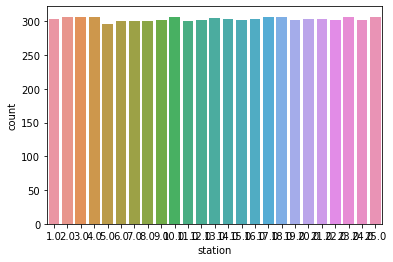

In [15]:
#ploting sns countplot for station
sns.countplot(df['station'])

* We can see data is not distributed normally.

<AxesSubplot:xlabel='Date', ylabel='count'>

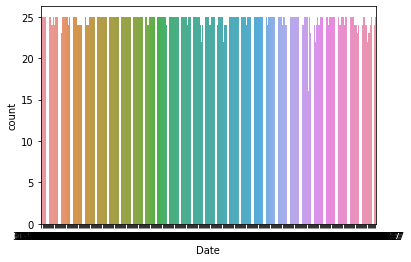

In [16]:
#ploting sns countplot for Date
sns.countplot(df['Date'])

* Look like  data distributed normally.

<AxesSubplot:xlabel='Present_Tmax', ylabel='count'>

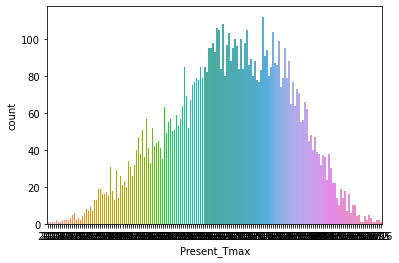

In [17]:
#ploting sns countplot for Present_Tmax
sns.countplot(df['Present_Tmax'])

* We can see data is not distributed normally.

<AxesSubplot:xlabel='Present_Tmin', ylabel='count'>

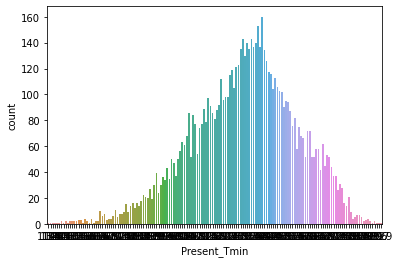

In [18]:
#ploting sns countplot for Present_Tmin
sns.countplot(df['Present_Tmin'])

* We can see data is not distributed normally.

<AxesSubplot:xlabel='lat', ylabel='count'>

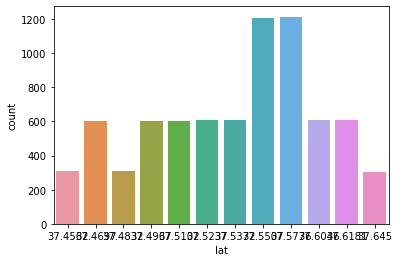

In [19]:
#ploting sns countplot for lat
sns.countplot(df['lat'])

* We can see data is not distributed normally.

<AxesSubplot:xlabel='lon', ylabel='count'>

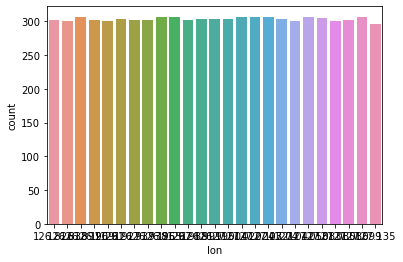

In [20]:
#ploting sns countplot for lon
sns.countplot(df['lon'])

* Look like data is distributed normally.

<AxesSubplot:xlabel='DEM', ylabel='count'>

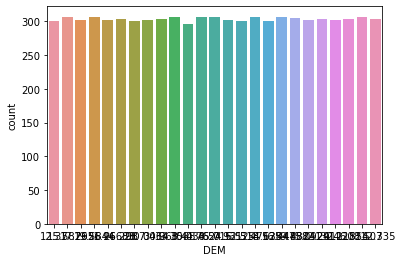

In [21]:
#ploting sns countplot for DEM
sns.countplot(df['DEM'])

* We can see data is not distributed normally.

<AxesSubplot:xlabel='Next_Tmin', ylabel='count'>

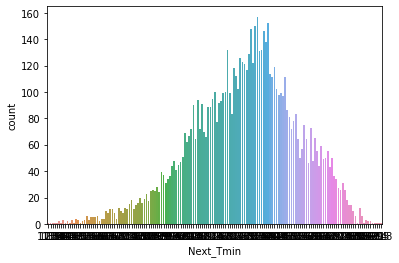

In [22]:
#ploting sns countplot for 
sns.countplot(df['Next_Tmin'])

* We can see data is not distributed normally.

<AxesSubplot:xlabel='Next_Tmax', ylabel='count'>

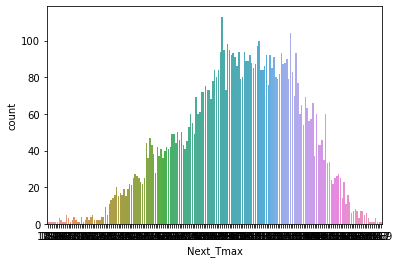

In [23]:
#ploting sns countplot for Next_Tmax
sns.countplot(df['Next_Tmax'])

* We can see data is not distributed normally.

<AxesSubplot:>

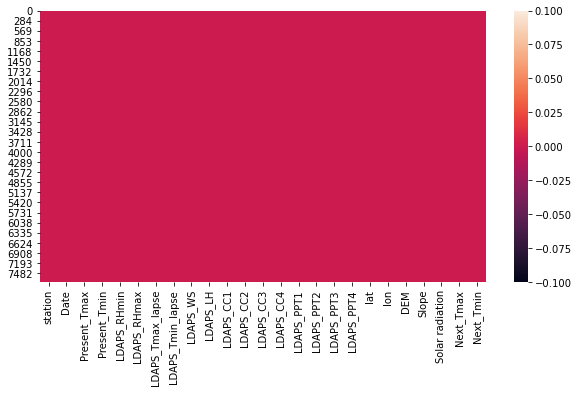

In [24]:
#ploting heatmap
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull())

* We can observe the null values in heatmap

In [25]:
#checking correlation
dfcor=df.corr()
dfcor

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
station,1.000000,0.113301,0.133282,-0.067846,-0.169351,0.069856,0.105277,0.005822,-0.132129,0.006539,...,-0.007635,-0.013865,-0.011085,-0.239118,-0.118845,-0.256706,-0.091721,-0.021194,0.107747,0.128184
Present_Tmax,0.113301,1.000000,0.615208,-0.209059,-0.306943,0.573777,0.628705,-0.125952,0.134246,-0.316333,...,-0.104779,-0.127248,-0.107295,-0.054134,0.007695,-0.189439,-0.107079,-0.022114,0.610357,0.621048
Present_Tmin,0.133282,0.615208,1.000000,0.122200,-0.018576,0.467904,0.772061,-0.038779,-0.012817,0.084348,...,0.066207,-0.052428,-0.070391,-0.081417,-0.045174,-0.254084,-0.148423,0.059765,0.463523,0.796975
LDAPS_RHmin,-0.067846,-0.209059,0.122200,1.000000,0.578358,-0.569580,0.085237,0.289422,-0.072195,0.612831,...,0.389572,0.237512,0.167311,0.085027,-0.077590,0.100684,0.122454,0.242168,-0.446824,0.093249
LDAPS_RHmax,-0.169351,-0.306943,-0.018576,0.578358,1.000000,-0.377293,-0.118965,0.131269,0.238986,0.435937,...,0.227581,0.132436,0.118101,0.194820,0.025563,0.176557,0.219436,0.146622,-0.289788,-0.076415
LDAPS_Tmax_lapse,0.069856,0.573777,0.467904,-0.569580,-0.377293,1.000000,0.653425,-0.316011,0.043663,-0.440878,...,-0.248369,-0.193749,-0.170415,-0.044052,0.091568,-0.181433,-0.163891,0.047414,0.835729,0.589963
LDAPS_Tmin_lapse,0.105277,0.628705,0.772061,0.085237,-0.118965,0.653425,1.000000,-0.134652,-0.139675,0.008714,...,-0.002743,-0.093116,-0.103541,-0.099452,-0.024703,-0.198396,-0.187864,0.157763,0.592119,0.886513
LDAPS_WS,0.005822,-0.125952,-0.038779,0.289422,0.131269,-0.316011,-0.134652,1.000000,0.004427,0.285349,...,0.181634,0.147199,0.134428,0.033025,-0.063009,0.188540,0.169223,0.120630,-0.351107,-0.102021
LDAPS_LH,-0.132129,0.134246,-0.012817,-0.072195,0.238986,0.043663,-0.139675,0.004427,1.000000,-0.148314,...,-0.084375,0.009495,0.012372,0.133309,0.024476,0.056362,0.087517,-0.044956,0.156779,-0.060392
LDAPS_CC1,0.006539,-0.316333,0.084348,0.612831,0.435937,-0.440878,0.008714,0.285349,-0.148314,1.000000,...,0.389368,0.166763,0.088897,-0.010268,-0.007962,-0.017378,-0.023893,0.218285,-0.459705,-0.012877


<AxesSubplot:>

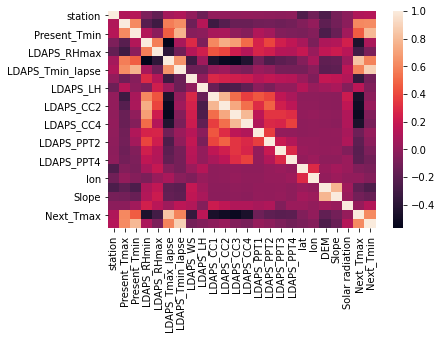

In [26]:
#ploting heatmap to check the correlation
sns.heatmap(dfcor)

* Here we can see the difference of corresponding values of dataset in this heatmap.

<AxesSubplot:>

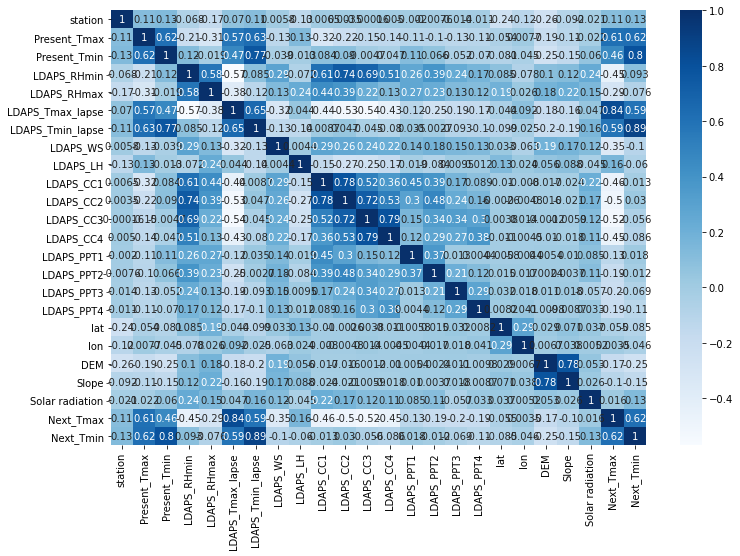

In [27]:
#ploting figure heatmap
plt.figure(figsize=(12,8))
sns.heatmap(dfcor, cmap='Blues', annot=True)

* In this heatmap dark shades are highly correlated

<AxesSubplot:>

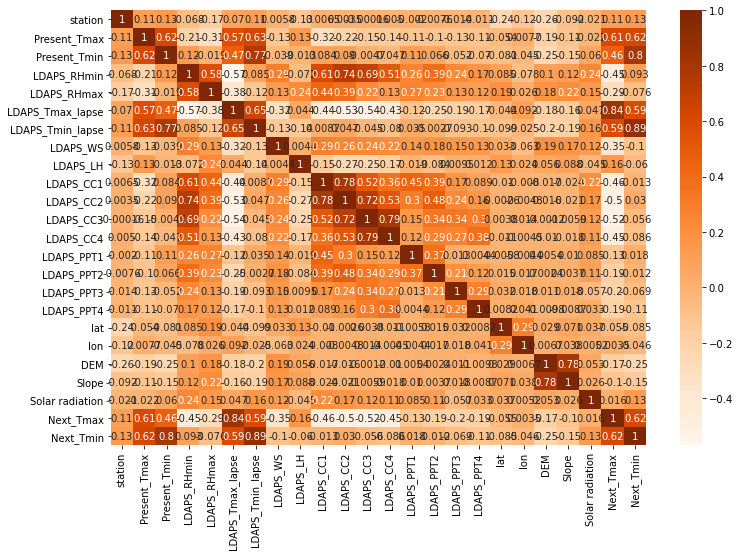

In [28]:
#ploting heatmap
plt.figure(figsize=(12,8))
sns.heatmap(dfcor,cmap='Oranges',annot=True)

* Light shades are highly correlated

## Plotting Outliers

In [29]:
#cheking columns
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [30]:
#making a list for outliers columns
cols=[ 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin']

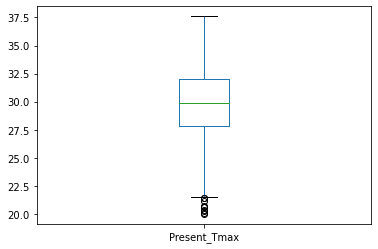

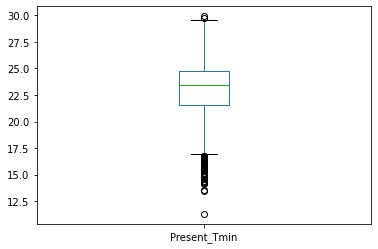

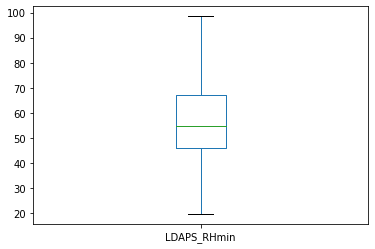

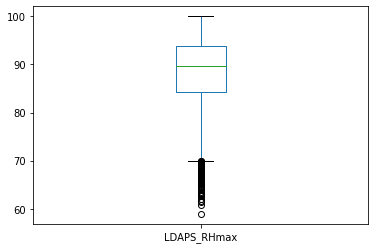

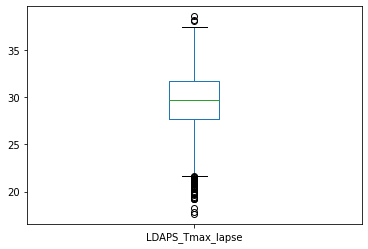

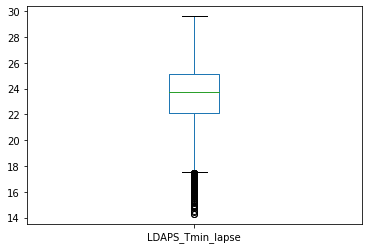

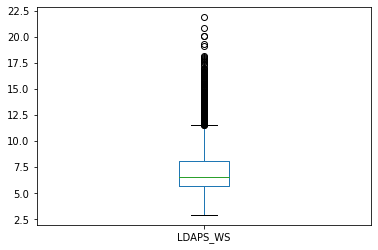

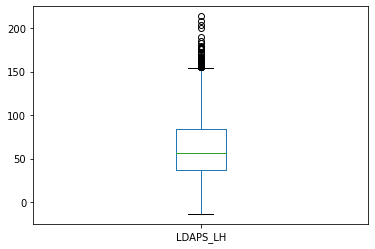

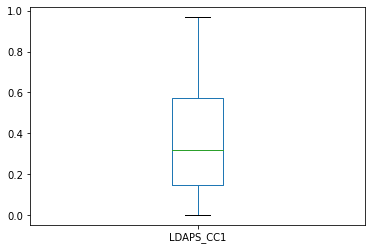

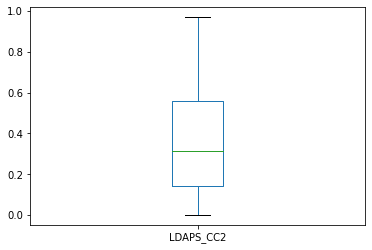

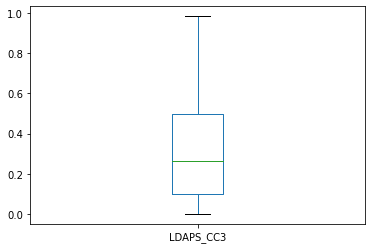

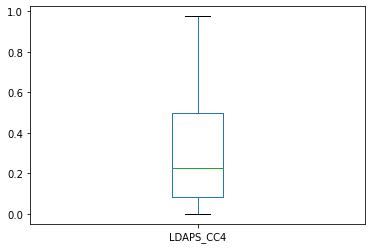

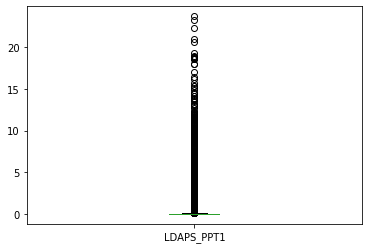

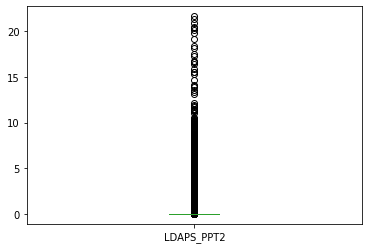

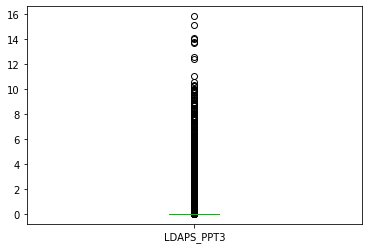

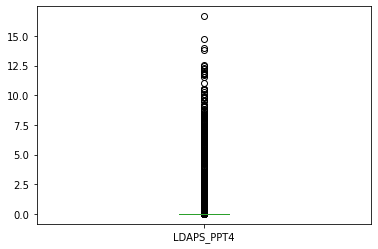

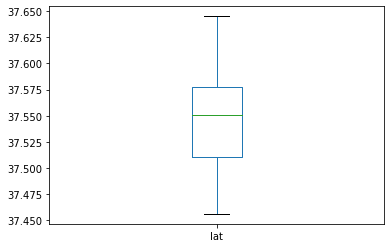

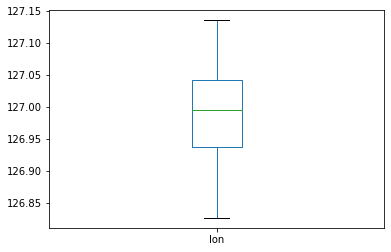

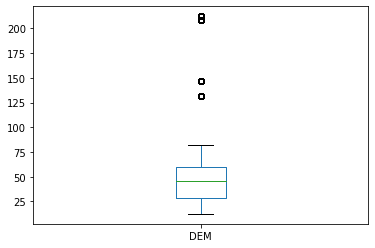

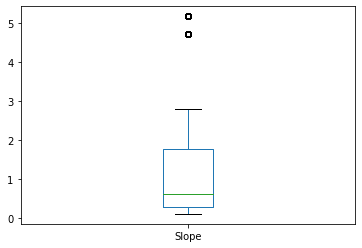

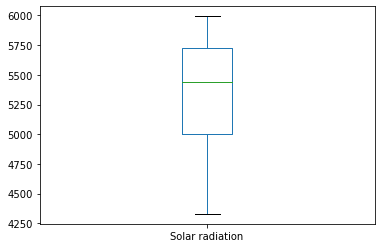

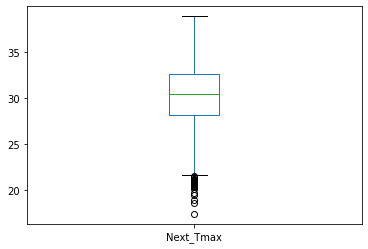

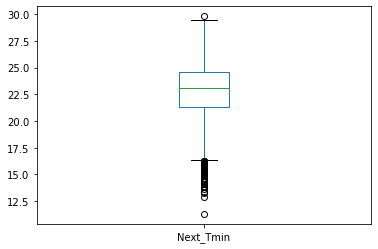

In [31]:
#writing for loop to plot outliers
for i in cols:
    df[i].plot.box()
    plt.show()

* Here some of the boxplot have the viscous so we can find outliers.

### Checking Skewness

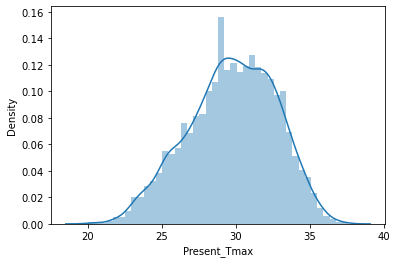

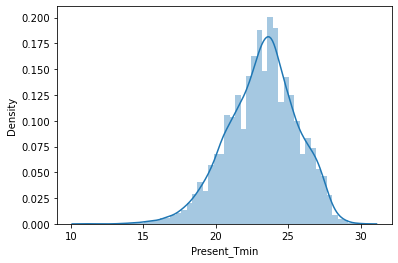

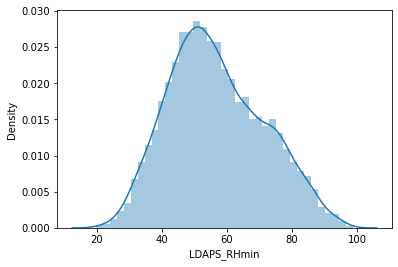

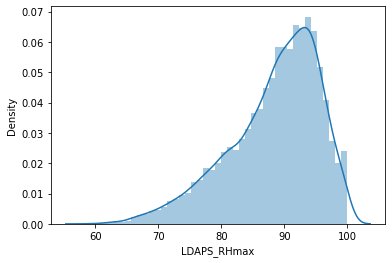

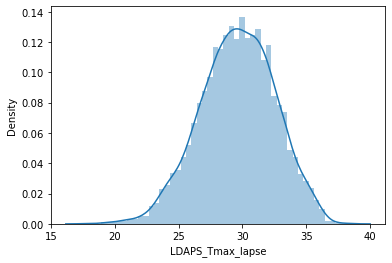

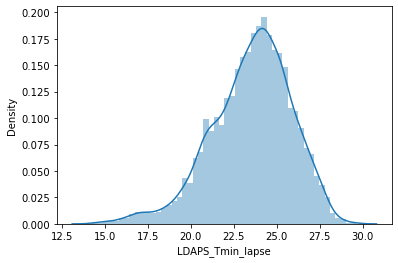

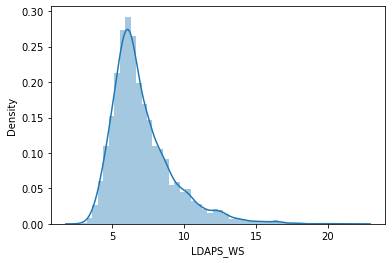

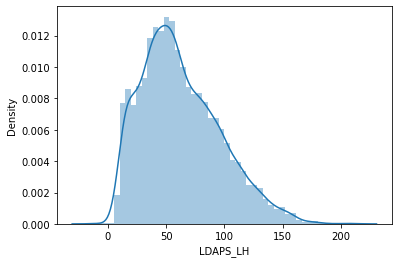

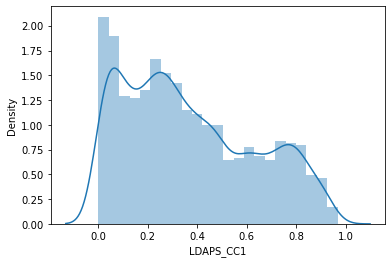

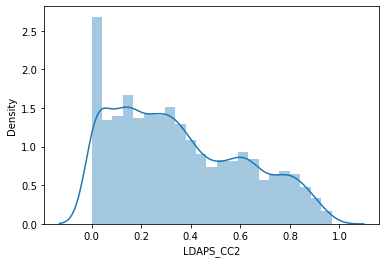

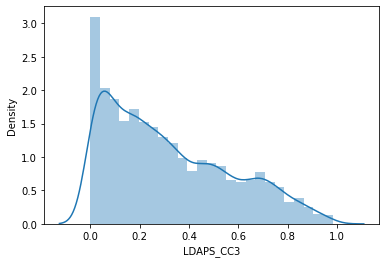

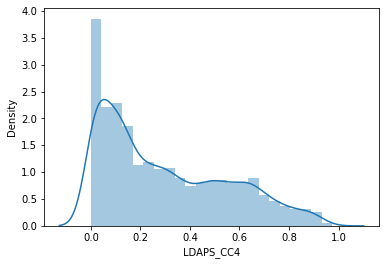

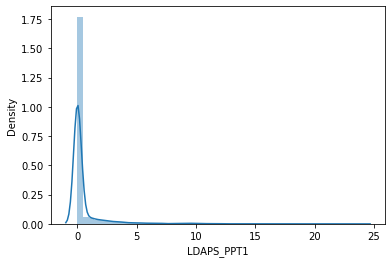

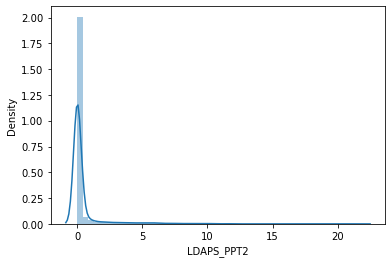

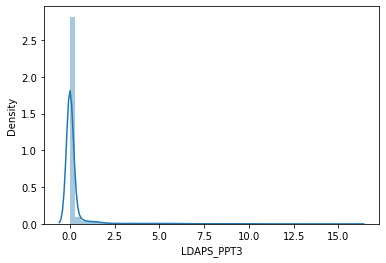

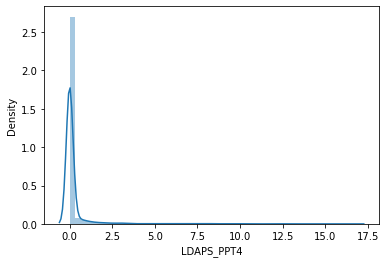

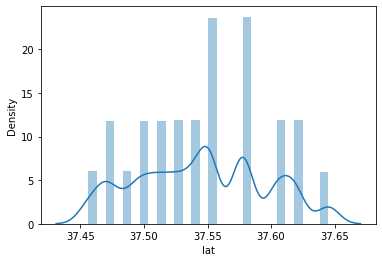

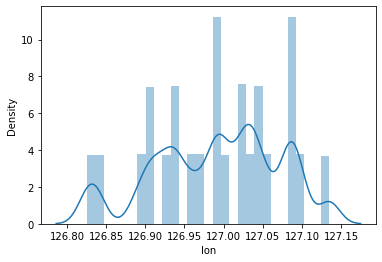

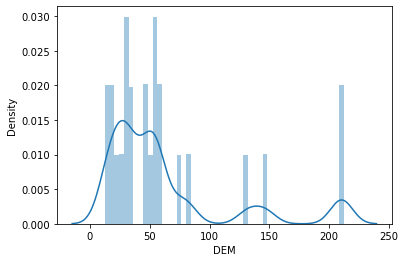

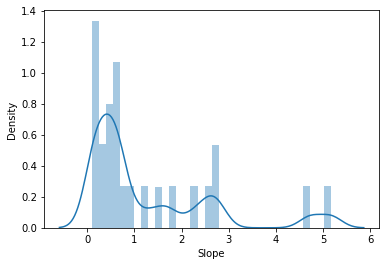

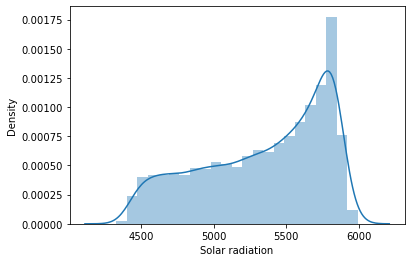

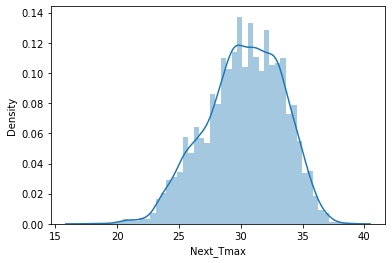

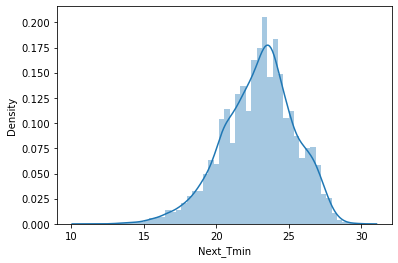

In [32]:
# writing for loop to plot checking skewness
for i in cols:
    sns.distplot(df[i], kde=True)
    plt.show()

* In this plotting we can see there are some right and left skewness and outlies too.

In [33]:
#cheking skewness
df.skew()

station            -0.004178
Present_Tmax       -0.257069
Present_Tmin       -0.353822
LDAPS_RHmin         0.301396
LDAPS_RHmax        -0.845264
LDAPS_Tmax_lapse   -0.222349
LDAPS_Tmin_lapse   -0.574035
LDAPS_WS            1.553926
LDAPS_LH            0.662971
LDAPS_CC1           0.456716
LDAPS_CC2           0.473929
LDAPS_CC3           0.639649
LDAPS_CC4           0.663815
LDAPS_PPT1          5.305906
LDAPS_PPT2          5.710360
LDAPS_PPT3          6.356670
LDAPS_PPT4          6.681256
lat                 0.085377
lon                -0.289048
DEM                 1.721617
Slope               1.559050
Solar radiation    -0.524325
Next_Tmax          -0.334842
Next_Tmin          -0.393662
dtype: float64

* We can see there is a significant skewness here in the dataset.

In [34]:
#preparing x and y dataset
df.drop('Present_Tmax',axis=1,inplace=True)
df.drop('Present_Tmin',axis=1,inplace=True)

In [35]:
#cheking head
df.head()

,station,Date,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [36]:
#cheking shape
df.shape

(7588, 23)

* Dataset contains 7588 rows and 23 columns.

In [37]:
#cheking columns
df.columns

Index(['station', 'Date', 'LDAPS_RHmin', 'LDAPS_RHmax', 'LDAPS_Tmax_lapse',
       'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2',
       'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3',
       'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope', 'Solar radiation',
       'Next_Tmax', 'Next_Tmin'],
      dtype='object')

* Dataset contains 23 columns.

In [38]:
#droping date
df.drop(['Date'],axis=1,inplace=True)

#### Removing Outliers

In [39]:
#importing zscore to remove outliers
from scipy.stats import zscore

In [40]:
#removing outliers
z= np.abs(zscore(df))
z

array([[1.66460654, 0.10466029, 0.38276804, ..., 1.51056517, 0.36686121,
        0.68926525],
       [1.52605214, 0.3050523 , 0.31169653, ..., 1.22299734, 0.08306779,
        0.1655135 ],
       [1.38749775, 0.54934444, 0.60942455, ..., 1.20960169, 0.27589451,
        0.39852685],
       ...,
       [1.38359018, 2.05008127, 1.31837609, ..., 2.09517477, 0.6239635 ,
        1.93821173],
       [1.52214457, 2.23473536, 1.5371407 , ..., 2.10667071, 0.52755014,
        1.65619156],
       [1.66069897, 2.310467  , 1.54425718, ..., 2.07648676, 0.78465243,
        2.2202319 ]])

* We can see all the outliers has removed

In [41]:
threshold=3
print(np.where(z>3))

(array([  25,   25,   26, ..., 7579, 7579, 7582]), array([ 5, 12, 12, ...,  4, 21,  4]))


In [42]:
#creating new dataset
df_new=df[(z<3).all(axis=1)]
df_new

,station,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,1.616969e-01,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,1.594441e-01,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,2.040915e-01,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,1.611574e-01,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,1.788925e-01,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,0.052902,0.030169,0.000000e+00,...,0.0,0.0,0.0,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7
7746,22.0,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,0.024518,5.850000e-07,...,0.0,0.0,0.0,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1
7747,23.0,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,0.000000e+00,...,0.0,0.0,0.0,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1
7748,24.0,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,0.000000e+00,...,0.0,0.0,0.0,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8


In [43]:
#cheking dataset shape
df.shape

(7588, 22)

* There are 7588 rows and 22 columns 

In [44]:
#checking new dataset shape
df_new.shape

(6760, 22)

* There are 6760 rows and 22 columns

### Handling Missing Value

In [45]:
#cheking null value
df.isnull().sum()

station             0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

* We can see there are no null values 

In [46]:
# filling null value by mean and median
df["Next_Tmax"]=df["Next_Tmax"].fillna(df["Next_Tmax"].mean())
df["Next_Tmin"]=df["Next_Tmin"].fillna(df["Next_Tmin"].median())

In [47]:
#checking null values
df.isnull().sum()

station             0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

## Standard Scalar Method

In [48]:
#importing librery
from sklearn.preprocessing import StandardScaler

In [49]:
scaler=StandardScaler()
scaledX=scaler.fit_transform(df)

In [50]:
scaledX

array([[-1.66460654,  0.10466029,  0.38276804, ...,  1.51056517,
        -0.36686121, -0.68926525],
       [-1.52605214, -0.3050523 ,  0.31169653, ...,  1.22299734,
         0.08306779, -0.1655135 ],
       [-1.38749775, -0.54934444, -0.60942455, ...,  1.20960169,
         0.27589451,  0.39852685],
       ...,
       [ 1.38359018, -2.05008127, -1.31837609, ..., -2.09517477,
        -0.6239635 , -1.93821173],
       [ 1.52214457, -2.23473536, -1.5371407 , ..., -2.10667071,
        -0.52755014, -1.65619156],
       [ 1.66069897, -2.310467  , -1.54425718, ..., -2.07648676,
        -0.78465243, -2.2202319 ]])

## PCA

In [51]:
#importing pca
from sklearn.decomposition import PCA

In [52]:
testpca= PCA()
Y = testpca.fit(scaledX)

In [53]:
Y.explained_variance_ratio_

array([0.2529756 , 0.13103696, 0.0876481 , 0.066473  , 0.0621535 ,
       0.05214139, 0.04591617, 0.04286857, 0.03823737, 0.03680187,
       0.03249544, 0.02995009, 0.02868972, 0.02544684, 0.01724612,
       0.01252263, 0.00949158, 0.00821644, 0.00651866, 0.00571289,
       0.00494192, 0.00251511])

In [54]:
var_cumu= np.cumsum(Y.explained_variance_ratio_)*100
var_cumu

array([ 25.29755965,  38.40125613,  47.16606662,  53.81336708,
        60.02871711,  65.24285645,  69.83447361,  74.12133058,
        77.94506743,  81.62525414,  84.87479773,  87.86980717,
        90.73877953,  93.28346377,  95.008076  ,  96.2603395 ,
        97.20949792,  98.03114223,  98.68300783,  99.25429667,
        99.74848854, 100.        ])

In [55]:
k=np.argmax(var_cumu>99)
print('Number of components explaining 99% variance:',k)

Number of components explaining 99% variance: 19


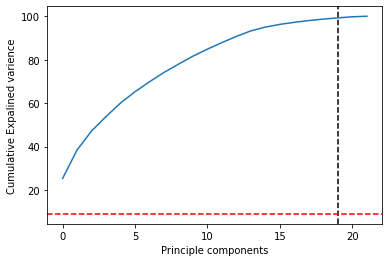

In [56]:
#ploting cumulative varience
plt.ylabel('Cumulative Expalined varience')
plt.xlabel('Principle components')
plt.axvline(x=k, color="k",linestyle="--")
plt.axhline(y=9, color="r",linestyle="--")

plt.plot(var_cumu)
plt.show()

* Here the plot x axis contains principan components and y axis conatins cumulative expalined varience

## Model Handling

In [57]:
#preparing x and y Next_Tmax
x_train=df.drop('Next_Tmax',axis=1)
y_train=df.Next_Tmax

In [58]:
#preparing x and y for Nest_Tmin
y_train=df.drop('Next_Tmin',axis=1)
y_train=df.Next_Tmin

In [59]:
#cheking x train head
x_train.head()

,station,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,...,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmin
0,1.0,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,...,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,21.2
1,2.0,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,...,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,22.5
2,3.0,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,...,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,23.9
3,4.0,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,...,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,24.3
4,5.0,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,...,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,22.5


In [60]:
#cheking y_train head
y_train.head()

0    21.2
1    22.5
2    23.9
3    24.3
4    22.5
Name: Next_Tmin, dtype: float64

In [61]:
#checking x_train shape
x_train.shape

(7588, 21)

* x train contains 7588 rows and 21 columns

In [62]:
#checking y_train
y_train.shape

(7588,)

* y train contains 7588 rows and zero columns

### Regressor Method

In [63]:
#importing train test splot method
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [64]:
#Preparing Next_Tmax
x=df.drop(['Next_Tmax'],axis=1)
y=df['Next_Tmax']
x_train,y_train,x_test,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [65]:
#Preparing Next_Tmin
x=df.drop(['Next_Tmin'],axis=1)
y=df['Next_Tmax']
x_train,y_train,x_test,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [66]:
#importing mean squared error
from sklearn.metrics import mean_squared_error
for i in range(200):
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=50)
    from sklearn.tree import DecisionTreeRegressor
    lm=DecisionTreeRegressor()
    lm.fit(x_train,y_train)
    y_pred=lm.predict(x_test)
    mse=mean_squared_error(y_test,y_pred)
    rmse=np.sqrt(mse)
    print(rmse)

0.018508268280147303
0.050491653910567334
0.03266793038882824
0.03763425681347393
0.029821603968282935
0.033267391956523014
0.021626851021634783
0.03849952517545098
0.04415805842479001
0.03185110286353031
0.05807632069125017
0.04452945317723433
0.03395338973610454
0.046766315591938695
0.04130608137267782
0.03286896570407816
0.03841387540267082
0.05801957781430046
0.05704631407842342
0.040419408583628955
0.02324186853994161
0.03266793038882826
0.019377669394079464
0.05285024957467463
0.020372033841662678
0.024751731683740265
0.03959611644363196
0.03395338973610448
0.057391703595848456
0.03780889467399234
0.03143473067309657
0.03992747047523461
0.05075192189225525
0.05383819020581649
0.046977134011076054
0.059477301612586804
0.05068698018697021
0.04533581330890013
0.05675688393065452
0.032364036059174144
0.019714697606425014
0.05285024957467473
0.03356310792281811
0.03296902366978941
0.05062195516958077
0.05558409455817762
0.02177862025921882
0.05790592525107541
0.055524804840442046
0.02

### DecisionTreeRegressor

In [67]:
#importing DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor()
regressor.fit(x_train,y_train)

DecisionTreeRegressor()

In [68]:
y_pred=regressor.predict(x_test)
y_pred

array([26.6, 30.7, 34.5, ..., 30.9, 28.2, 25.5])

In [69]:
dt_accuracy=round(regressor.score(x_train,y_train)*100,2)
dt_accuracy

100.0

* The test accuracy of Decission tree regressor is 100%.

### Linear Regression

In [70]:
#importing DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [71]:
y_pred=regressor.predict(x_test)
y_pred

array([26.6, 30.7, 34.5, ..., 30.9, 28.2, 25.5])

In [72]:
lr_accuracy=round(regressor.score(x_train,y_train)*100,2)
lr_accuracy

100.0

* The test accuracy of Linear Regression is 100%

### Random Forest Regressor

In [73]:
#importing Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(x_train,y_train)

RandomForestRegressor()

In [74]:
y_pred=regressor.predict(x_test)
y_pred

array([26.6, 30.7, 34.5, ..., 30.9, 28.2, 25.5])

In [75]:
rf_accuracy=round(regressor.score(x_train,y_train)*100,2)
rf_accuracy

100.0

* The test accuracy of Random Forest Regressor is 100%

### SVR

In [76]:
#importing svr
from sklearn.svm import SVR
regressor = SVR()
regressor.fit(x_train,y_train)

SVR()

In [77]:
y_pred=regressor.predict(x_test)
y_pred

array([30.22168282, 30.6113375 , 30.72239862, ..., 30.46640179,
       30.29027731, 30.42023565])

In [78]:
svm_accuracy=round(regressor.score(x_train,y_train)*100,2)
svm_accuracy

6.1

* The test accuracy of svr is 6.1%

### KNeighbors Regressor

In [79]:
#importing KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor
regressor=KNeighborsRegressor()
regressor.fit(x_train,y_train)

KNeighborsRegressor()

In [80]:
y_pred=regressor.predict(x_test)
y_pred

array([27.56, 32.4 , 32.72, ..., 29.56, 31.16, 27.7 ])

In [81]:
knn_accuracy=round(regressor.score(x_train,y_train)*100,2)
knn_accuracy

71.4

* The test accuracy of KNeighborsRegressor is 71.4%

### Cross Validation

In [82]:
#importing cross val score
from sklearn.model_selection import cross_val_score

In [83]:
#Decission Tree Regressor 
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor()
print(cross_val_score(regressor,x,y,cv=5).mean())

0.9998373477218914


In [84]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor()
print(cross_val_score(regressor,x,y,cv=5).mean())

0.9998091352543874


In [85]:
#SVR
from sklearn.svm import SVR
regressor=SVR()
print(cross_val_score(regressor,x,y,cv=5).mean())

-0.053457990808168446


In [86]:
#LinearRegression
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
print(cross_val_score(regressor,x,y,cv=5).mean())

1.0


In [87]:
#KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor
regressor=KNeighborsRegressor()
print(cross_val_score(regressor,x,y,cv=5).mean())

0.23022236204377125


### Hyperparameter Tunning

In [88]:
#importing GridSearchCV
from sklearn.model_selection import GridSearchCV

In [89]:
parameter={'max_depth':[1,3,5,7,9,11,12],
           'criterion':['mse','friedman_mse']}

In [90]:
GCV=GridSearchCV(DecisionTreeRegressor(),parameter,cv=5)

In [91]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'friedman_mse'],
                         'max_depth': [1, 3, 5, 7, 9, 11, 12]})

In [92]:
GCV.best_params_

{'criterion': 'mse', 'max_depth': 11}

### Evaluating The Final Model

In [93]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor()
regressor.fit(x_train,y_train)
Final_mod=DecisionTreeRegressor()
Final_mod.fit(x_train,y_train)
pred=Final_mod.predict(x_test)
print(regressor.score(x_test,y_test)*100)

99.98837248099403


### Saving The Model

In [94]:
import joblib
joblib.dump(Final_mod,' Temperature Forecast Project.csv')

[' Temperature Forecast Project.csv']

* Model has saved as  Temperature Forecast Project.csv

### Prediction Method

In [95]:
#prediction methid
Final_mod=DecisionTreeRegressor()
Final_mod.fit(x_train,y_train)
pred=Final_mod.predict(x_test)
preds=regressor.predict(x_test)
print(preds[:36])
print(y_test[:36].values)

[26.6 30.7 34.5 29.9 29.2 33.7 26.6 28.7 35.5 29.1 24.7 26.5 26.1 32.8
 31.  29.4 34.5 32.8 33.6 29.1 26.4 35.  29.6 30.9 27.8 34.2 30.5 31.
 31.2 28.8 29.6 31.5 31.  33.  35.  25.6]
[26.6 30.7 34.5 29.9 29.2 33.7 26.6 28.7 35.5 29.1 24.7 26.5 26.1 32.8
 31.  29.4 34.5 32.8 33.6 29.1 26.4 35.  29.6 30.9 27.8 34.2 30.5 31.
 31.2 28.8 29.6 31.5 31.  33.  35.  25.6]


* The tain and test data is balanced most of the classification methods and hit 99.98% accuracy with the dataset.